In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
cancer=pd.read_table('hints-test.csv', sep=',')

In [ ]:
cancer.head()


In [ ]:
lookup_Cancer_name = dict(zip(cancer.Cancer_label.unique(), cancer.Cancer_name.unique()))   
lookup_Cancer_name

In [ ]:
X = cancer[['Gender', 'Age', 'Income']]
y = cancer['Cancer_label']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [18]:
# first example
cancer_prediction = knn.predict([[1, 40, 3]])
lookup_Cancer_name[cancer_prediction[0]]


'Liver'

In [45]:
cancer_prediction = knn.predict([[1, 50, 7]])
lookup_Cancer_name[cancer_prediction[0]]

'Breast'

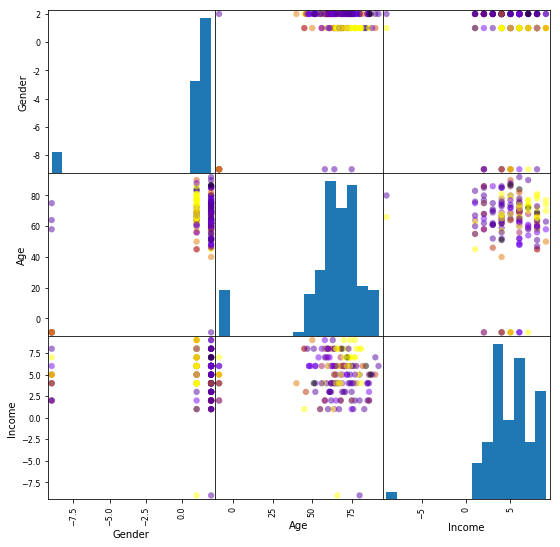

In [21]:
from matplotlib import cm

X = cancer[['Gender', 'Age', 'Income']]
y = cancer['Cancer_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

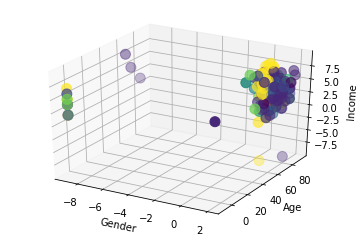

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Gender'], X_train['Age'], X_train['Income'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
plt.show()

In [23]:
cancer_prediction = knn.predict([[2, 60, 3]])
lookup_Cancer_name[cancer_prediction[0]]

'Breast'

In [24]:
cancer_prediction = knn.predict([[2, 90, 1]])
lookup_Cancer_name[cancer_prediction[0]]

'Breast'

In [25]:
#decision trees

from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import tree
import collections
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import io
from scipy import misc
import imageio

In [26]:
c = DecisionTreeClassifier(min_samples_split=100)
train, test = train_test_split(X,)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
features = ['Gender', 'Age', 'Income']
X_train = train[features]
y_train = train['Cancer_label']

X_test = test[features]
y_test = test['Cancer_label']
target_names = ['Bladder','Breast', 'Colon','Endometrial', 'Leukemia', 'Liver', 'Lung','NonHodgkins','Pancreatic','Prostate']


KeyError: 'Cancer_label'

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#if the test performs worse than the training --> overfitting problem

Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision Tree classifier on test set: 0.38


In [28]:
dot_data = tree.export_graphviz(clf,feature_names=data_feature_name)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')

for edge in graph.get_edge_list():
    edges[edges.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edge[edge].sort()
    for i in range(2):
        dest = graph.get_note(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
graph.write_png('tree.png')

NameError: name 'data_feature_name' is not defined

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)



NameError: name 'X_cancer' is not defined

In [31]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 0.61
Accuracy of Decision Tree classifier on test set: 0.58


In [32]:
dt = c.fit(X_train, y_train)

In [33]:
def show_tree(tree, features,path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,40)
    plt.imshow(img)
    
  

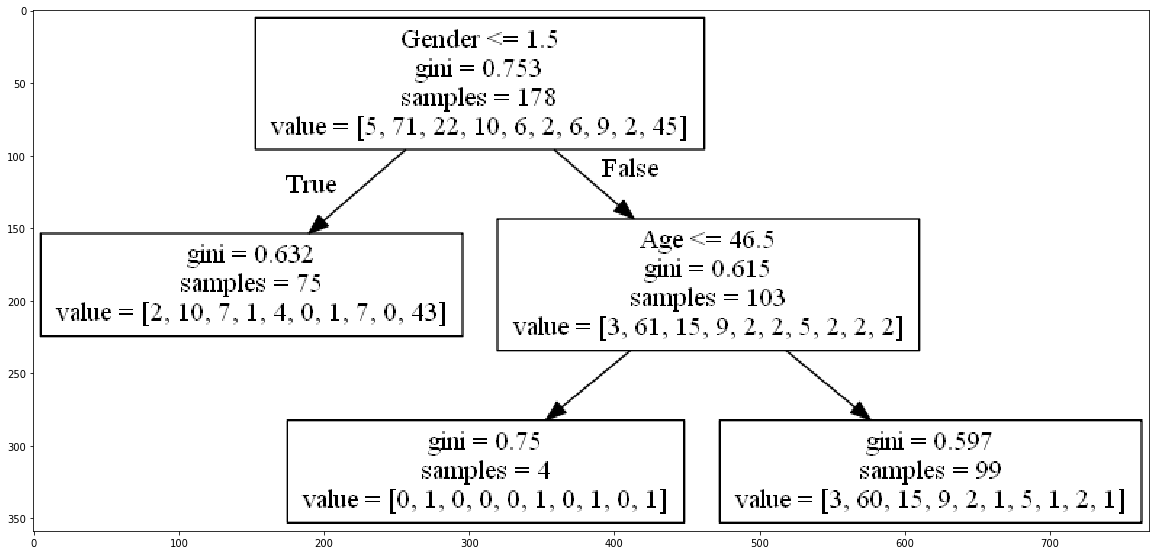

In [34]:
show_tree(dt, features, 'hints_dec_tree.png')

In [38]:
y_pred = c.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [40]:
print("Accuracy using Decision Tree:", round(score,1), "%")

#pretty good accuracy of this decision tree

Accuracy using Decision Tree: 63.3 %
